In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [8]:
df=pd.read_csv('telecom_churn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [12]:
df_num=df.select_dtypes(['float64','int64'])

In [13]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [14]:
df_cat=df.select_dtypes(object)

In [15]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [16]:
df_cat["TotalCharges"].replace(' ',np.nan,inplace=True)

In [17]:
df_cat['TotalCharges'].isnull().sum()

11

In [18]:
df_cat["TotalCharges"]=df_cat["TotalCharges"].astype("float")

In [19]:
df_cat["TotalCharges"].fillna(df_cat["TotalCharges"].mean(),inplace=True)

In [20]:
df_num["TotalCharges"]=df_cat["TotalCharges"]

In [21]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [22]:
df_cat.drop('TotalCharges',axis=1,inplace=True)

In [23]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [24]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [25]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [26]:
df_new=pd.concat([df_cat,df_num],axis=1)

In [27]:
df_new.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,5375,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,0,1,29.85,29.85
1,3962,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,0,34,56.95,1889.50
2,2564,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,0,2,53.85,108.15
3,5535,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,6511,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,0,2,70.70,151.65


In [28]:
df_new.shape

(7043, 21)

In [29]:
df_new.drop('customerID',inplace=True,axis=1)

In [30]:
X=df_new.drop('Churn',axis=1)
Y=df_new["Churn"]

In [31]:
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65


In [32]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [34]:
ss=StandardScaler()

In [35]:
x_train_ss=ss.fit_transform(X_train)
x_test_ss=ss.transform(X_test)

In [36]:
X.shape

(7043, 19)

In [37]:
model=tf.keras.Sequential([
       tf.keras.layers.Dense(1,input_shape=(X.shape[1],),activation="sigmoid")
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [40]:
rus=RandomUnderSampler()

In [41]:
X_sample,Y_sample=rus.fit_sample(x_train_ss,Y_train)

In [42]:
trained_model=model.fit(X_sample,Y_sample,epochs=50)

Epoch 1/50
84/84 [==============================] - 0s 3ms/step - loss: 0.7060
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.6302
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5922
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5703
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5563
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5466
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5395
Epoch 8/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5341
Epoch 9/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 10/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5264
Epoch 11/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5235
Epoch 12/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5211
Epoch 13/50
84/84 [==============================

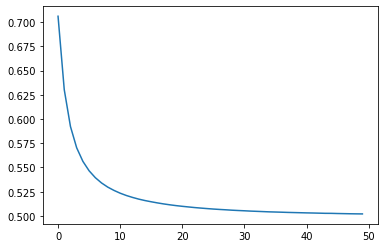

In [43]:
plt.plot(trained_model.history['loss'])

In [44]:
Y_pred=model.predict(x_test_ss)

In [45]:
Y_pred

array([[0.22220716],
       [0.24404937],
       [0.60407495],
       ...,
       [0.8629073 ],
       [0.11783063],
       [0.08894527]], dtype=float32)

In [46]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [47]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1585
           1       0.51      0.82      0.63       528

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.76      0.78      2113

